# Task 1

In [3]:
%matplotlib inline
import numpy as np
import math as mt
import matplotlib
import matplotlib.pyplot as plt
from pylab import *
from scipy.stats import *

In [4]:
theta_ = 100
class cubic_gen(rv_continuous):
    def _pdf(self, x):
        return (2.*(theta_**2.))/(x**3.)
cubic = cubic_gen(a=theta_, name='cubic')

expa_ = 5
expb_ = 1
class exp_gen(rv_continuous):
    def _pdf(self, x):
        return (1/(float(expa_)))*exp((float(expb_)-x)/float(expa_))
expon = exp_gen(a=expb_, name='expon')

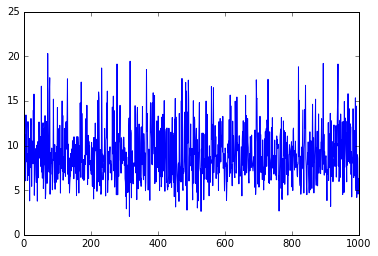

In [5]:
K = 1000
N = 1000
M = 11
# s_all = np.zeros((M,N))

# s_all[0] = norm.rvs(size=N)
s = gamma.(9, size=N)
# s_all[2] = uniform.rvs(-1, 7, size=N)
# s_all[3] = poisson.rvs(4, loc=0, size=N)
# s_all[4] = binom.rvs(100, 0.3, size=N)
# s_all[5] = geom.rvs(0.3, size=N)
# s_all[6] = beta.rvs(2, 4, size=N)
# s_all[7] = pareto.rvs(5, size=N)
# s_all[8] = cauchy.rvs(size=N)
# s_all[9] = cubic.rvs(size=N)
# s_all[10] = expon.rvs(size=N)
plot(s)
# figure()
# plot(s_all[9])
# show()

# Method of Moments

# Normal

In [ ]:
disps = np.zeros((2, N-1))

s = norm.rvs(size=N)
sigma = np.array([var(s[0:n]) for n in range(1,N)])
a = np.array([mean(s[0:n]) for n in range(1,N)])

for i in range(N-1):
    tmp = np.zeros((2, K))
    for j in range(K):
        s = norm.rvs(loc=a[i], scale=sigma[i], size=i+1)
        tmp[0][j] = mean(s)
        tmp[1][j] = var(s)
    disps[0][i] = var(tmp[0])
    disps[1][i] = var(tmp[1])

figure()
plot(disps[0])
show()

figure()
plot(disps[1])
show()

# Gamma

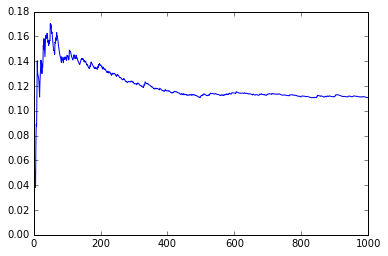

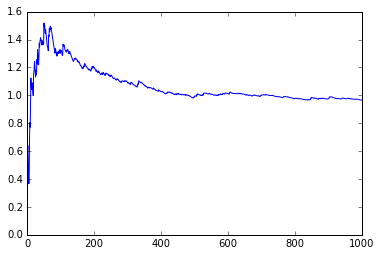

In [126]:
par1 = np.array([var(s_all[1][0:n])/(mean(s_all[1][0:n])**2.) for n in range(1,N)])
par2 = np.array([var(s_all[1][0:n])/mean(s_all[1][0:n]) for n in range(1,N)])
figure()
plot(par1)
show()
figure()
plot(par2)
show()

# Uniform

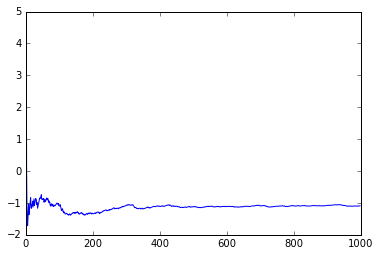

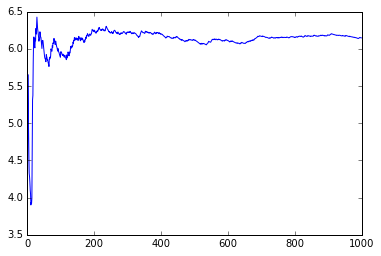

In [127]:
par1 = np.array([mean(s_all[2][0:n])-((3*var(s_all[2][0:n]))**0.5) for n in range(1,N)])
par2 = np.array([mean(s_all[2][0:n])+((3*var(s_all[2][0:n]))**0.5) for n in range(1,N)])
figure()
plot(par1)
show()
figure()
plot(par2)
show()

# Poisson

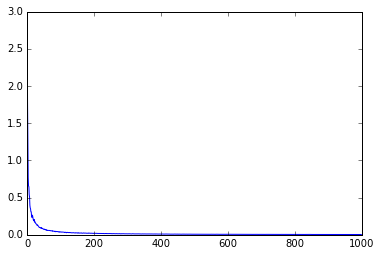

In [16]:
disps = np.zeros(N-1)

s = poisson.rvs(4, size=N)
lam = np.array([mean(s[0:n]) for n in range(1,N)])

for i in range(N-1):
    tmp = np.zeros(K)
    for j in range(K):
        s = poisson.rvs(lam[i], size=i+1)
        tmp[j] = mean(s)
    disps[i] = var(tmp)

figure()
plot(disps)
show()

Binom

In [17]:
par1 = np.array([1-(var(s_all[4][0:n])/mean(s_all[4][0:n])) for n in range(1,N)])
par1 = np.array([(mean(s_all[4][0:n])**2)/(mean(s_all[4][0:n])-var(s_all[4][0:n])) for n in range(1,N)])

NameError: name 's_all' is not defined

# Geom

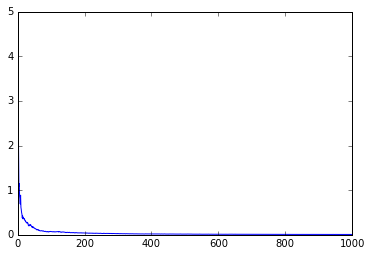

In [18]:
disps = np.zeros(N-1)

s = geom.rvs(0.3, size=N)
p = np.array([1/mean(s[0:n]) for n in range(1,N)])

for i in range(N-1):
    tmp = np.zeros(K)
    for j in range(K):
        s = geom.rvs(p[i], size=i+1)
        tmp[j] = mean(s)
    disps[i] = var(tmp)

figure()
plot(disps)
show()

Beta

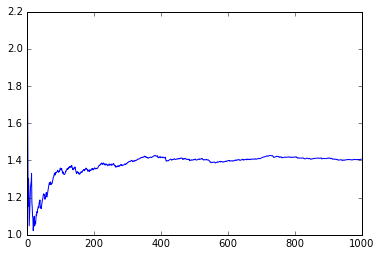

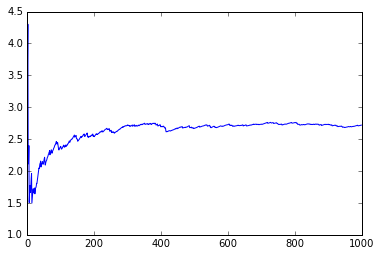

In [132]:
par1 = np.array([ (mean(s_all[6][0:n])**2)/(var(s_all[6][0:n])+ \
                    (mean(s_all[6][0:n]) * mean(s_all[6][0:n]**2))) for n in range(1,N) ])
par2 = np.array([ (mean(s_all[6][0:n])*(1-mean(s_all[6][0:n])))/(var(s_all[6][0:n])+ \
                    (mean(s_all[6][0:n]) * mean(s_all[6][0:n]**2))) for n in range(1,N) ])
figure()
plot(par1)
show()
figure()
plot(par2)
show()

# Pareto

In [99]:
disps = np.zeros(N-1)

s = pareto.rvs(5, size=N)
gamma = np.array([1/mean(log(s[0:n])) for n in range(1,N)])

for i in range(N-1):
    tmp = np.zeros(K)
    for j in range(K):
        s = pareto.rvs(gamma[i], size=i+1)
        tmp[j] = mean(s)
    disps[i] = var(tmp)

figure()
ylim(0,0.1)
plot(disps)
show()

KeyboardInterrupt: 

# Cauchy

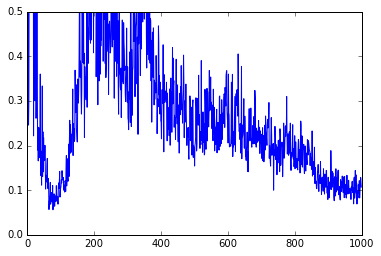

In [126]:
disps = np.zeros(N-1)

s = cauchy.rvs(scale=2,size=N)
pre = [(((x>=0)and(x<=1)) and 1 or 0) for x in s]
thetas = np.array([1/(tan(pi*mean(pre[0:n]))==0 and 1 or tan(pi*mean(pre[0:n]))) for n in range(1,N)])

for i in range(N-1):
    tmp = np.zeros(K)
    for j in range(K):
        s = cauchy.rvs(thetas[i], size=i+1)
        pre = [(((x>=0)and(x<=1)) and 1 or 0) for x in s]
        tmp[j] = 1/(tan(pi*mean(pre))==0 and 1 or tan(pi*mean(pre)))
    disps[i] = var(tmp)

figure()
ylim(0,0.5)
plot(disps)
show()

# Cubic

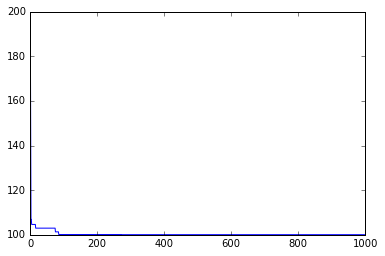

In [136]:
# !!!!!!!!!!!

disps = np.zeros(N-1)

s = cubic.rvs(size=N)
thetas = np.array([min(s) for n in range(1,N)])

for i in range(N-1):
    tmp = np.zeros(K)
    for j in range(K):
        s = # TRUBLES!!!!
        tmp[j] = mean(s)
    disps[i] = var(tmp)

figure()
plot(disps)
show()

Expon

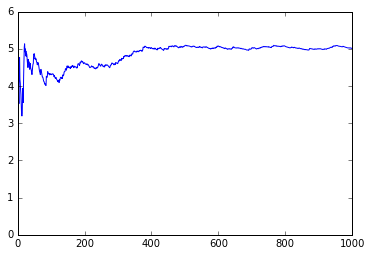

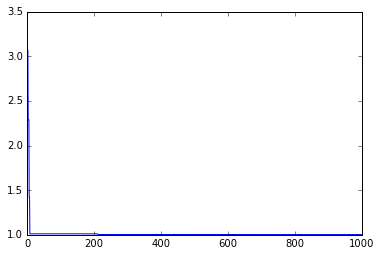

In [138]:
disps = np.zeros(2,N-1)

s = expon.rvs(size=N)
a_par = np.array([mean(s[0:n])-min(s[0:n]) for n in range(1,N)])
b_par = np.array([min(s[0:n]) for n in range(1,N)])

for i in range(N-1):
    tmp = np.zeros(2,K)
    for j in range(K):
        s = # TRUBLES!!!!
        tmp[j] = mean(s)
    disps[0][i] = var(tmp[0])
    disps[1][i] = var(tmp[1])

figure()
plot(disps[0])
show()

figure()
plot(disps[1])
show()

In [104]:
disps = np.zeros(10)

print disps

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
